In [37]:
"""
This file takes likert_data.csv as input, conduct analysis on within-subject correlation and inter class correlation
"""
import json
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from os.path import basename
from scipy.stats import spearmanr

## Read likert data into file. 

In [38]:
input_path = 'likert_data.csv'

likert_data = pd.read_csv(input_path, index_col=0)  # shape = (3732, 6)
print likert_data.shape
likert_data.head()

(3732, 6)


,subId,rt,imgName,isRepeat,rating,trial_index
0,AA4JYAPLYB6QT:3IHR8NYAM98O30JQO1D3O0IPQZO4PR,6706,/static/images/faces/empty-image-1.jpg,False,5,6
1,AA4JYAPLYB6QT:3IHR8NYAM98O30JQO1D3O0IPQZO4PR,6257,/static/images/2kfaces/Google_1_Kenneth Cabral...,0,8,8
2,AA4JYAPLYB6QT:3IHR8NYAM98O30JQO1D3O0IPQZO4PR,3712,/static/images/2kfaces/Google_1_Gary Nance_3_o...,0,4,9
3,AA4JYAPLYB6QT:3IHR8NYAM98O30JQO1D3O0IPQZO4PR,3759,/static/images/2kfaces/Google_1_Victoria Ambro...,0,5,10
4,AA4JYAPLYB6QT:3IHR8NYAM98O30JQO1D3O0IPQZO4PR,4251,/static/images/2kfaces/Google_1_Claudia Rohrer...,0,3,11


# make a list for subjects. 

In [39]:
sub_num_dict = {}
sub_counter = 1
for sub_id in likert_data['subId']:
    if sub_id not in sub_num_dict:
        sub_num_dict[sub_id] = sub_counter
        sub_counter += 1
likert_data['subNum'] = likert_data['subId'].map(sub_num_dict)

# make a easy-to-read numbered list for images 

In [40]:
img_num_dict = {}
img_counter = 0
for img_name in likert_data['imgName']:
    if img_name not in img_num_dict:
        img_num_dict[img_name] = img_counter
        img_counter += 1
        
likert_data['imgNum'] = likert_data['imgName'].map(img_num_dict)

In [41]:
new_df = likert_data.sort_values(by=['subNum','isRepeat', 'imgNum'], ascending=True)
new_df.drop(columns=['subId', 'imgName'], inplace=True)
new_df = new_df[['subNum', 'imgNum', 'isRepeat', 'rating', 'rt']]  
# new_df.groupby('subNum').count()
# new_df[new_df['imgNum']==0]
# new_df.head()

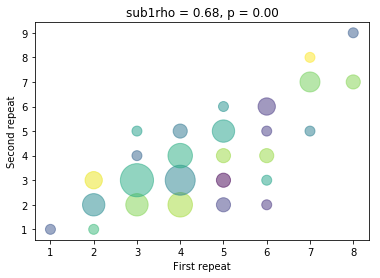

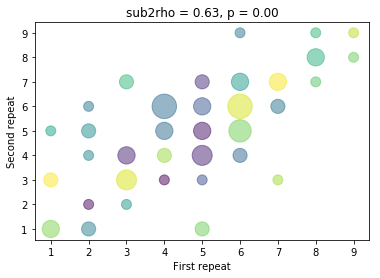

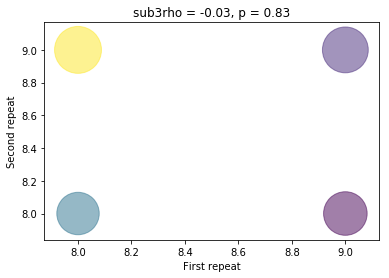

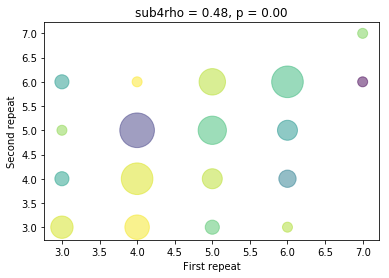

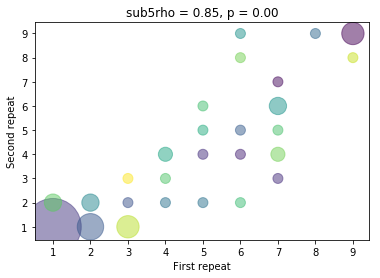

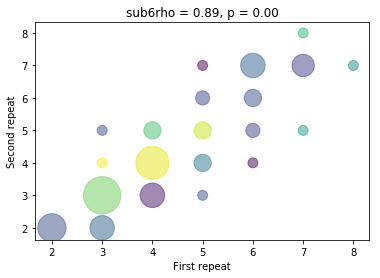

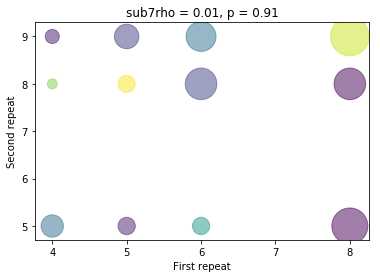

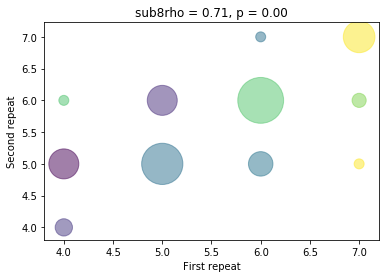

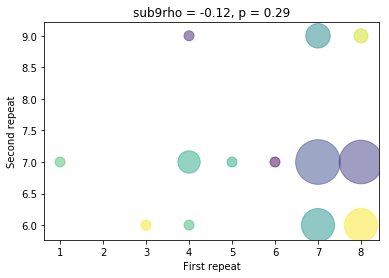

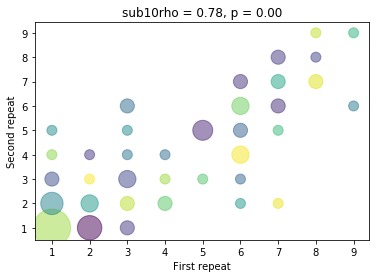

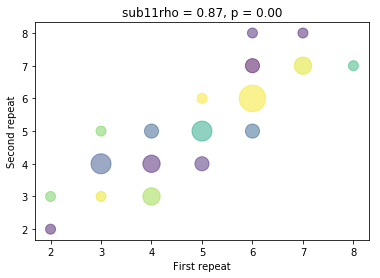

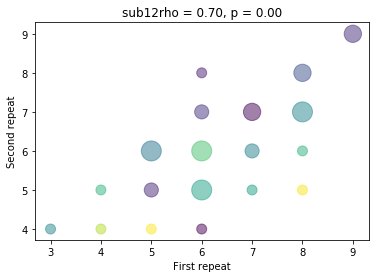

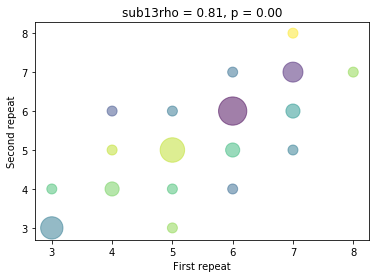

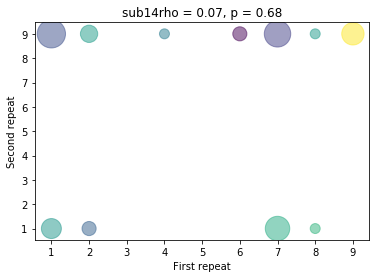

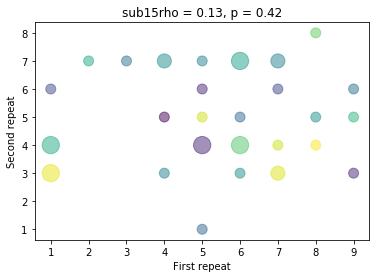

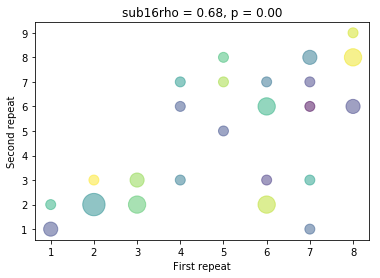

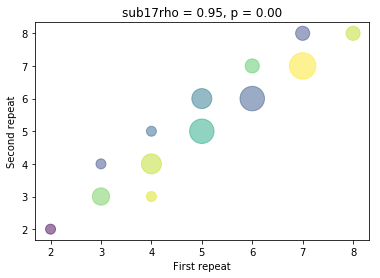

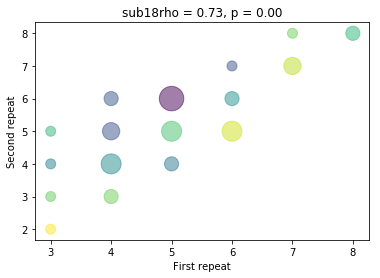

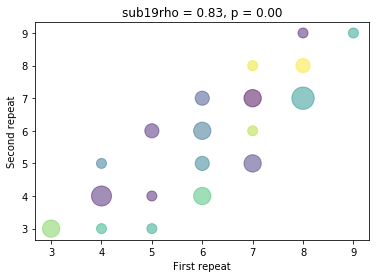

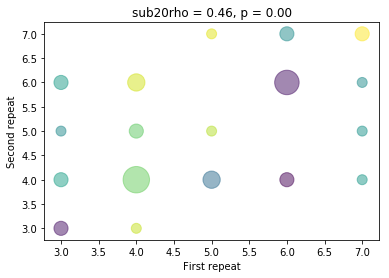

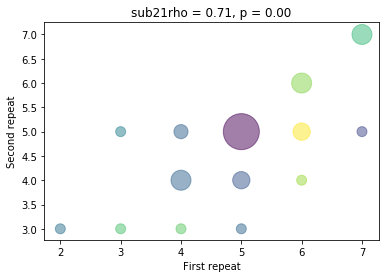

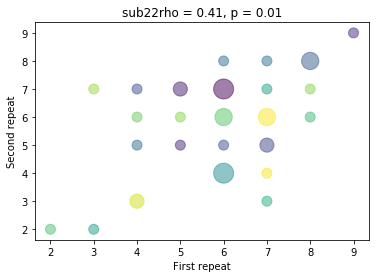

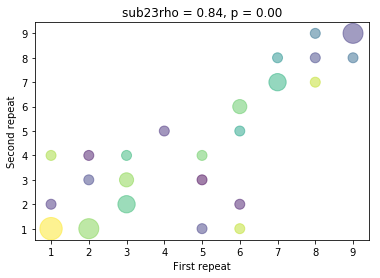

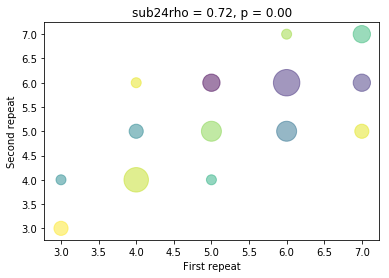

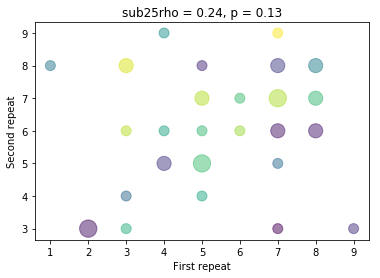

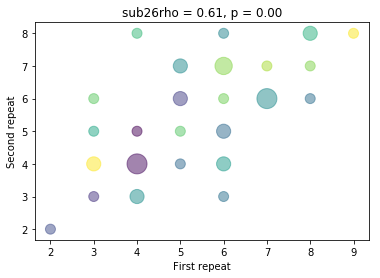

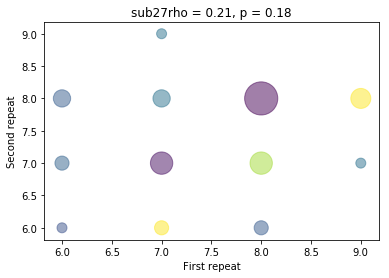

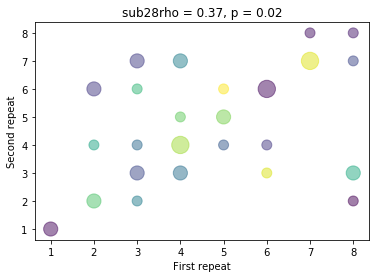

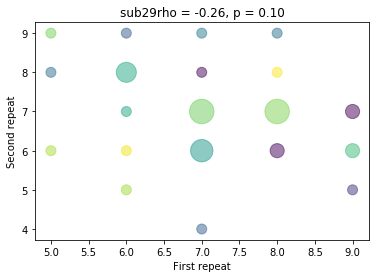

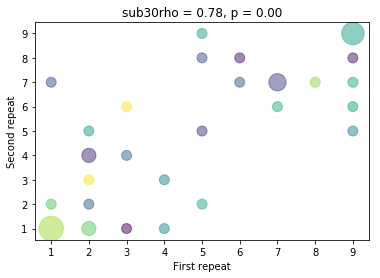

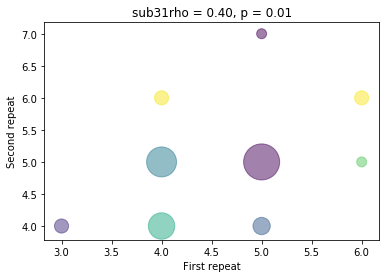

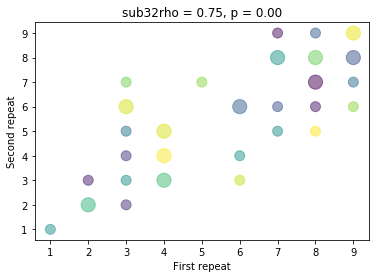

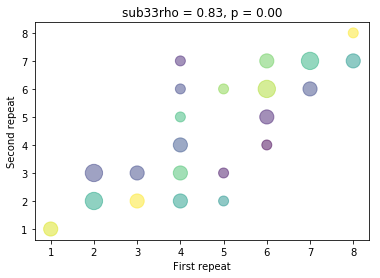

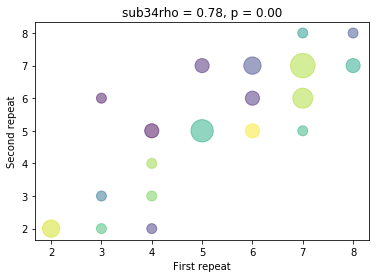

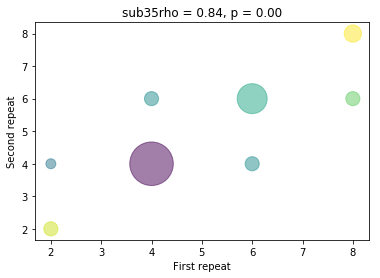

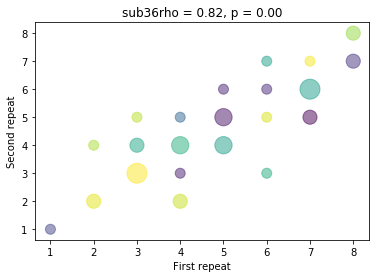

In [31]:
for cur_sub_id in range(1, len(new_df['subNum'].unique())+1):
    cur_sub_data = new_df[new_df['subNum']==cur_sub_id]
    
    empty = cur_sub_data[cur_sub_data['imgNum']==0]['rating'].values
    
    cur_sub_data = cur_sub_data[cur_sub_data['imgNum']!=0]

    
    cur_data_length = len(cur_sub_data)
    unique_trial_num = cur_data_length / 2
    if cur_data_length % 2 !=0:
        raise Exception('the data length should be divisble by 2.')
        
    first_half = cur_sub_data.head(unique_trial_num)['rating'].values
    second_half = cur_sub_data.tail(unique_trial_num)['rating'].values
    rho, p = spearmanr(first_half, second_half)
#     if p > 0.05:
#         print('sub id = {}, empty = {}, ave = {:.1f}, std = {:.1f}, rho = {:.1f}, p = {:.1f}'.
#               format(cur_sub_id, empty, cur_sub_data['rating'].mean(), cur_sub_data['rating'].std(), rho, p))
    
    unique_coor = sorted(set(zip(first_half, second_half)))
    total_coor = list(zip(first_half, second_half))
    
    size = []
    
    for coor in unique_coor:
        size.append(total_coor.count(coor))
    
    x_unique_coor, y_unique_coor = zip(*unique_coor)
    
    colors = np.random.rand(len(x_unique_coor))
    
    plt.title('sub' + str(cur_sub_id)+'rho = {:.2f}, p = {:.2f}'.format(rho, p))
    plt.xlabel('First repeat')
    plt.ylabel('Second repeat')
    plt.scatter(x_unique_coor, y_unique_coor, s=np.array(size)*100, alpha=0.5, c=colors)
    plt.show()
        
    

In [ ]:
# good subjects. 36, 34, 23, 19, 17. 
good_lst = [36, 34, 23, 19, 17]


## Prepare a csv file: faces * raters pilot 2

In [49]:
# compute first pilot and second pilot separately. 

unique_trial_target = 40
throw_away_counter = 0
group_rating_matrix = []  # 40 (faces) * 25 (subjects)


for cur_sub_id in range(1, len(new_df['subNum'].unique())+1):
    cur_sub_data = new_df[new_df['subNum']==cur_sub_id]
    
    empty = cur_sub_data[cur_sub_data['imgNum']==0]['rating'].values
    
    cur_sub_data = cur_sub_data[cur_sub_data['imgNum']!=0]

    
    cur_data_length = len(cur_sub_data)
    unique_trial_num = cur_data_length / 2
    
#     if unique_trial_num == 40:
#         print 'Pilot 2'
#     elif unique_trial_num == 80:
#         print 'Pilot 1'
#     else: 
#         print 'Error'
        
    if unique_trial_num == unique_trial_target:
        if cur_data_length % 2 !=0:
            raise Exception('the data length should be divisble by 2.')

        first_half = cur_sub_data.head(unique_trial_num)['rating'].values ## 40 * 1
        second_half = cur_sub_data.tail(unique_trial_num)['rating'].values  # 40 * 1

        rho, p = spearmanr(first_half, second_half)
        
        if p > 0.05: 
            throw_away_counter += 1
            print('Throw away current subject')
        else:
            ave_rating = (first_half + second_half) / 2.0
            group_rating_matrix.append(ave_rating)
            
group_rating_array = np.array(group_rating_matrix) 
print throw_away_counter
print group_rating_array.shape
group_rating_array = np.transpose(group_rating_array)
print group_rating_array.shape

Throw away current subject
Throw away current subject
Throw away current subject
Throw away current subject
Throw away current subject
5
(21, 40)
(40, 21)


In [36]:
np.savetxt("pilot2_group_data.csv", group_rating_array, delimiter=",")

## compute pilot 1 data

In [42]:
# compute first pilot and second pilot separately. 

unique_trial_target = 80
throw_away_counter = 0
group_rating_matrix = []  # 40 (faces) * 25 (subjects)


for cur_sub_id in range(1, len(new_df['subNum'].unique())+1):
    cur_sub_data = new_df[new_df['subNum']==cur_sub_id]
    
    empty = cur_sub_data[cur_sub_data['imgNum']==0]['rating'].values
    
    cur_sub_data = cur_sub_data[cur_sub_data['imgNum']!=0]

    
    cur_data_length = len(cur_sub_data)
    unique_trial_num = cur_data_length / 2
        
    if unique_trial_num == unique_trial_target:
        if cur_data_length % 2 !=0:
            raise Exception('the data length should be divisble by 2.')

        first_half = cur_sub_data.head(unique_trial_num)['rating'].values ## 40 * 1
        second_half = cur_sub_data.tail(unique_trial_num)['rating'].values  # 40 * 1

        rho, p = spearmanr(first_half, second_half)
        
        if p > 0.05: 
            throw_away_counter += 1
            print('Throw away current subject')
        else:
            ave_rating = (first_half + second_half) / 2.0
            group_rating_matrix.append(ave_rating)
            
group_rating_array = np.array(group_rating_matrix) 
print throw_away_counter
print group_rating_array.shape  

group_rating_array = np.transpose(group_rating_array)
print group_rating_array.shape

np.savetxt("pilot1_group_data.csv", group_rating_array, delimiter=",")

Throw away current subject
Throw away current subject
Throw away current subject
3
(7, 80)
(80, 7)


In [43]:
empty

array([5, 5])

In [44]:
empty.shape

(2,)

In [45]:
group_rating_array.shape


(80, 7)

In [47]:
ind_1 = 0
ind_2 = 1

rho, p = spearmanr(group_rating_array[:, ind_1], group_rating_array[:, ind_2])
print rho, p

0.4060424495811091 0.00018627571864714086


## pilot group 1

In [48]:
for i in range(0, group_rating_array.shape[1]-1):
    for j in range(i+1, group_rating_array.shape[1]):
        rho, p = spearmanr(group_rating_array[:, i], group_rating_array[:, j])
        print('{}, {}, {:.2f}, {:.2f}'.format(i, j, rho, p))

0, 1, 0.41, 0.00
0, 2, -0.03, 0.81
0, 3, 0.21, 0.06
0, 4, -0.13, 0.25
0, 5, 0.25, 0.03
0, 6, 0.23, 0.04
1, 2, 0.30, 0.01
1, 3, 0.66, 0.00
1, 4, 0.37, 0.00
1, 5, 0.29, 0.01
1, 6, 0.61, 0.00
2, 3, 0.22, 0.05
2, 4, 0.38, 0.00
2, 5, 0.12, 0.30
2, 6, 0.33, 0.00
3, 4, 0.72, 0.00
3, 5, 0.16, 0.15
3, 6, 0.53, 0.00
4, 5, 0.23, 0.04
4, 6, 0.44, 0.00
5, 6, 0.33, 0.00


## pilot group 2

In [51]:
for i in range(0, group_rating_array.shape[1]-1):
    for j in range(i+1, group_rating_array.shape[1]):
        rho, p = spearmanr(group_rating_array[:, i], group_rating_array[:, j])
        if p < 0.05:
            print('{}, {}, {:.2f}, {:.2f}'.format(i, j, rho, p))

0, 1, 0.35, 0.03
0, 2, 0.50, 0.00
0, 3, 0.42, 0.01
0, 4, 0.52, 0.00
0, 5, 0.47, 0.00
0, 6, 0.34, 0.03
0, 8, 0.42, 0.01
0, 10, 0.58, 0.00
0, 12, 0.37, 0.02
0, 16, 0.36, 0.02
0, 17, 0.32, 0.04
0, 19, 0.39, 0.01
0, 20, 0.32, 0.04
1, 3, 0.41, 0.01
1, 4, 0.38, 0.02
1, 5, 0.53, 0.00
1, 7, 0.40, 0.01
1, 10, 0.57, 0.00
1, 11, -0.35, 0.03
1, 12, 0.52, 0.00
1, 17, 0.72, 0.00
1, 18, -0.33, 0.04
1, 20, 0.34, 0.03
2, 3, 0.37, 0.02
2, 4, 0.41, 0.01
2, 6, 0.36, 0.02
2, 9, 0.37, 0.02
2, 10, 0.38, 0.01
2, 13, 0.50, 0.00
3, 4, 0.42, 0.01
3, 5, 0.32, 0.04
3, 6, 0.44, 0.00
3, 7, 0.36, 0.02
3, 8, 0.58, 0.00
3, 10, 0.43, 0.01
3, 12, 0.34, 0.03
3, 17, 0.44, 0.00
4, 5, 0.37, 0.02
4, 7, 0.32, 0.04
4, 8, 0.45, 0.00
4, 10, 0.59, 0.00
4, 12, 0.45, 0.00
4, 17, 0.60, 0.00
4, 19, 0.72, 0.00
5, 7, 0.44, 0.00
5, 10, 0.50, 0.00
5, 12, 0.59, 0.00
5, 17, 0.52, 0.00
5, 19, 0.34, 0.03
5, 20, 0.47, 0.00
6, 9, 0.35, 0.03
6, 11, 0.47, 0.00
6, 13, 0.35, 0.02
6, 16, 0.56, 0.00
6, 18, 0.35, 0.03
6, 20, 0.50, 0.00
7, 17, 0.67, 0.

In [53]:
import seaborn as sns; sns.set()

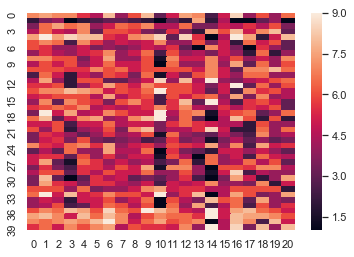

In [55]:
%matplotlib inline
ax = sns.heatmap(group_rating_array)

In [56]:
group_rating_array.shape

(40, 21)

In [57]:

good_lst = [36, 34, 23, 19, 17]

good_1 = 36
good_2 = 34

good_data_1 = new_df[new_df['subNum'] == good_1]
good_data_1 = good_data_1[good_data_1['imgNum'] != 0]
good_rating_1 = good_data_1['rating'].values


good_data_2 = new_df[new_df['subNum'] == good_2]
good_data_2 = good_data_2[good_data_2['imgNum'] != 0]
good_rating_2 = good_data_2['rating'].values

rho, p = spearmanr(good_rating_1, good_rating_2)
print rho, p

0.07929857620324429 0.4844224112740555


In [58]:

good_lst = [36, 34, 23, 19, 17]

good_1 = 36
good_2 = 23

good_data_1 = new_df[new_df['subNum'] == good_1]
good_data_1 = good_data_1[good_data_1['imgNum'] != 0]
good_rating_1 = good_data_1['rating'].values


good_data_2 = new_df[new_df['subNum'] == good_2]
good_data_2 = good_data_2[good_data_2['imgNum'] != 0]
good_rating_2 = good_data_2['rating'].values

rho, p = spearmanr(good_rating_1, good_rating_2)
print rho, p

0.19256747786379544 0.08702112695291923


In [59]:
good_lst = [36, 34, 23, 19, 17]

good_1 = 36
good_2 = 23

good_data_1 = new_df[new_df['subNum'] == good_1]
good_data_1 = good_data_1[good_data_1['imgNum'] != 0]
good_rating_1 = good_data_1['rating'].values


good_data_2 = new_df[new_df['subNum'] == good_2]
good_data_2 = good_data_2[good_data_2['imgNum'] != 0]
good_rating_2 = good_data_2['rating'].values

rho, p = spearmanr(good_rating_1, good_rating_2)
print rho, p

0.19256747786379544 0.08702112695291923


In [60]:
good_lst = [36, 34, 23, 19, 17]

good_1 = 36
good_2 = 19

good_data_1 = new_df[new_df['subNum'] == good_1]
good_data_1 = good_data_1[good_data_1['imgNum'] != 0]
good_rating_1 = good_data_1['rating'].values


good_data_2 = new_df[new_df['subNum'] == good_2]
good_data_2 = good_data_2[good_data_2['imgNum'] != 0]
good_rating_2 = good_data_2['rating'].values

rho, p = spearmanr(good_rating_1, good_rating_2)
print rho, p

0.4775719892865821 7.48357508092271e-06


In [61]:
good_lst = [36, 34, 23, 19, 17]

good_1 = 17
good_2 = 19

good_data_1 = new_df[new_df['subNum'] == good_1]
good_data_1 = good_data_1[good_data_1['imgNum'] != 0]
good_rating_1 = good_data_1['rating'].values


good_data_2 = new_df[new_df['subNum'] == good_2]
good_data_2 = good_data_2[good_data_2['imgNum'] != 0]
good_rating_2 = good_data_2['rating'].values

rho, p = spearmanr(good_rating_1, good_rating_2)
print rho, p

-0.03658281032495657 0.7473279115144998
